In [1]:
#ANN-LSTM model 
import pandas as pd
import numpy as np
from numpy import std
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import mean
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from matplotlib import pyplot
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import sklearn
import sklearn
print(f'NumPy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'scikit-learn: {sklearn.__version__}')
print('##############################################################################################################################')
print("stage 1 import neccessary packages completed successfully ")
print()
print('##############################################################################################################################')

global all_accuracy
all_accuracy=list()
#to print DataFrame on single line
pd.set_option('expand_frame_repr', True)
time_steps=1
global x_train
global x_test
global y_train
global y_test

2025-05-26 03:39:46.421761: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748230786.625962      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748230786.680983      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


NumPy: 1.26.4
pandas: 2.2.3
scikit-learn: 1.2.2
##############################################################################################################################
stage 1 import neccessary packages completed successfully 

##############################################################################################################################


In [2]:
# Đọc dữ liệu từ các file CSV
final_phase1_train_df = pd.read_csv("/kaggle/input/final-data/phase1/user_train_phase_1_train.csv")
final_phase2_train_df = pd.read_csv("/kaggle/input/final-data/phase2/user_train_phase_2_train.csv")
final_phase3_train_df = pd.read_csv("/kaggle/input/final-data/phase3/user_train_phase_3_train.csv")
final_phase4_train_df = pd.read_csv("/kaggle/input/final-data/phase4/user_train_phase_4_train.csv")

final_phase1_test_df = pd.read_csv("/kaggle/input/final-data/phase1/user_train_phase_1_test.csv")
final_phase2_test_df = pd.read_csv("/kaggle/input/final-data/phase2/user_train_phase_2_test.csv")
final_phase3_test_df = pd.read_csv("/kaggle/input/final-data/phase3/user_train_phase_3_test.csv")
final_phase4_test_df = pd.read_csv("/kaggle/input/final-data/phase4/user_train_phase_4_test.csv")

# load the prepared OULAD dataset
# data_final=pd.read_csv('data_final.csv', sep=',')
# print(data_final.head())
# print(data_final.shape)
# print()
# print()
final_phase1_test_df.shape

(698, 68)

In [3]:
final_phase2_train_df.columns

Index(['user_id', 'school', 'course_id', 'encoded_field_sum', 'start_year',
       'start_month', 'end_year', 'end_month', 'user_year', 'user_month',
       ...
       'video_time_between_views_std_2', 'video_speed_avg_2', 'entropy_time_2',
       'total_words_phase2', 'total_positive2', 'total_negative2',
       'total_neutral2', 'total_score', 'label', 'label_encoded'],
      dtype='object', length=111)

In [4]:
# def prepare_dataset(time_steps, phase):
#     print('experiment of time_steps= ',time_steps)
#     print()
#     print('##############################################################################################################################')
    

#     # global Y
#     # global X
    
#     train_df = globals()[f'final_phase{phase}_train_df']
#     test_df = globals()[f'final_phase{phase}_test_df']
    
#     X_train = train_df.drop(['label', 'label_encoded','total_score'], axis=1)
#     X_test = test_df.drop(['label', 'label_encoded', 'total_score'], axis=1)
    
#     # Chỉ giữ lại các cột numeric
#     X_train = X_train.select_dtypes(include=[np.number])
#     X_test = X_test.select_dtypes(include=[np.number])
    
#     X_train = np.array(X_train)
#     X_test = np.array(X_test)

#     print('X numpy containing sample_rows except final_result column')
#     print(X_train[:5])
#     print(X_train.shape)
#     print()
#     print('##############################################################################################################################')
     
#     Y_train = np.array(final_phase1_train_df['label'])
#     Y_test = np.array(final_phase1_test_df['label'])
#     print('Y numpy containing sample_rows final_result column')
#     print(Y_train[:5])
#     print(Y_train.shape)
#     print()
#     print('##############################################################################################################################')

#     print('stage 6 prepare X and Y completed successfully')
#     print()
#     print('##############################################################################################################################')
    
#     #     data_final=data_final.drop(['final_result'],1)
   
    
#     # apply one hot encoder for final result feature
#     print('##############################################################################################################################')
#     print()
#     print('stage 7 # apply one hot encoder for final result feature in Y')
#     print()
#     print('##############################################################################################################################')
    
    
#     label_encoder = LabelEncoder()
#     Y_train = label_encoder.fit_transform(Y_train)
#     Y_test = label_encoder.fit_transform(Y_test)
#     print('Y after apply fit_transform(y) label encoder')
#     print(Y_train[:5])
#     print(Y_train.shape)
#     print()
#     print('##############################################################################################################################')
    
    
#     global target_strings 
#     target_strings = label_encoder.classes_
    
#     print('##############################################################################################################################')
#     print()
#     print('stage 7  apply one hot encoder for  Y completed successfully')
#     print()
#     print('##############################################################################################################################')
    

#     #Y.reshape(-1,1,1)
#     #num of all instances=32,590 num of smple =round(.25*32590)
#     print('##############################################################################################################################')
#     print()
#     print('stage 8  apply minmax scaler for features in X')
#     print()
#     print('##############################################################################################################################')
#     # define min max scaler
#     scaler = MinMaxScaler()
    
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.fit_transform(X_test)
#     print('X after apply minmax transforming')
#     print(X_train[:1])
#     print(X_train.shape)
#     print()
#     print('##############################################################################################################################')
    
#     # global x_train
#     # global x_test
#     # global y_train
#     # global y_test
#     #x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=(10000*time_steps))
#     x_train,x_test,y_train,y_test= X_train, X_test, Y_train, Y_test
#     new_len_test = len(x_test) // time_steps * time_steps
#     x_test = x_test[:new_len_test]
#     y_test = y_test[:new_len_test]
    
#     new_len_train = len(x_train) // time_steps * time_steps
#     x_train = x_train[:new_len_train]
#     y_train = y_train[:new_len_train]
    
    
#     print('x_train ')
#     print(x_train[:1])
#     print(x_train.shape)
#     print()
#     print('##############################################################################################################################')
    
#     print('y_train ')
#     print(y_train[:1])
#     print(y_train.shape)
#     print()
#     print('##############################################################################################################################')
    
#     print('x_test ')
#     print(x_test[:1])
#     print(x_test.shape)
#     print()
#     print('##############################################################################################################################')
    
#     print('y_test ')
#     print(y_test[:1])
#     print(y_test.shape)
#     print()
#     print('##############################################################################################################################')
   
#     print('##############################################################################################################################')
#     print()
#     print('stage 10  Converts Y arrays  to binary class matrix using to_categorical ')
#     print()
#     print('##############################################################################################################################')
    
    
#     ########################################################################
#     #convert labelclass to categorical values 
#     #You use to_categorical to transform your training data before you pass it to your model
#     #Converts a class vector (integers) to binary class matrix.
    
#     y_train = to_categorical(y_train)                                        #
#     y_test = to_categorical(y_test)                                          #
#     #########################################################################
#     print('y_train ')
#     print(y_train[:1])
#     print(y_train.shape)
#     print()


#     x_train=x_train.reshape(-1,time_steps,67)
#     x_test=x_test.reshape(-1,time_steps,67)
#     # y_train=y_train.reshape(-1,time_steps,5)
#     # y_test=y_test.reshape(-1,time_steps,5)
    
#     print('xxx_train ')
#     print(x_train)
#     print(x_train.shape)
#     print()
#     print('#######################################################################')
    
#     print('y_train ')
#     print(y_train[:1])
#     print(y_train.shape)
#     print()
#     print('########################################################################')
    
#     print('x_test ')
#     print(x_test[:1])
#     print(x_test.shape)
#     print()
#     print('#######################################################################')
    
#     print('y_test ')
#     print(y_test[:1])
#     print(y_test.shape)
#     print()
#     print('######################################################################')

#     return x_train,x_test,y_train,y_test

In [5]:
def prepare_dataset(time_steps, phase):
    print('experiment of time_steps= ',time_steps)
    print()
    print('##############################################################################################################################')
    

    # global Y
    # global X
    
    train_df = globals()[f'final_phase{phase}_train_df']
    test_df = globals()[f'final_phase{phase}_test_df']
    
    X_train = train_df.drop(['label', 'label_encoded', 'total_score'], axis=1)
    X_test = test_df.drop(['label', 'label_encoded', 'total_score'], axis=1)
    
    # Chỉ giữ lại các cột numeric
    X_train = X_train.select_dtypes(include=[np.number])
    X_test = X_test.select_dtypes(include=[np.number])
    
    X_train = np.array(X_train)
    X_test = np.array(X_test)

    print('X numpy containing sample_rows except final_result column')
    print(X_train[:5])
    print(X_train.shape)
    print()
    print('##############################################################################################################################')
     
    Y_train = np.array(final_phase1_train_df['label'])
    Y_test = np.array(final_phase1_test_df['label'])
    print('Y numpy containing sample_rows final_result column')
    print(Y_train[:5])
    print(Y_train.shape)
    print()
    print('##############################################################################################################################')

    print('stage 6 prepare X and Y completed successfully')
    print()
    print('##############################################################################################################################')
    
    #     data_final=data_final.drop(['final_result'],1)
   
    
    # apply one hot encoder for final result feature
    print('##############################################################################################################################')
    print()
    print('stage 7 # apply one hot encoder for final result feature in Y')
    print()
    print('##############################################################################################################################')
    
    
    label_encoder = LabelEncoder()
    Y_train = label_encoder.fit_transform(Y_train)
    Y_test = label_encoder.fit_transform(Y_test)
    print('Y after apply fit_transform(y) label encoder')
    print(Y_train[:5])
    print(Y_train.shape)
    print()
    print('##############################################################################################################################')
    
    
    global target_strings 
    target_strings = label_encoder.classes_
    
    print('##############################################################################################################################')
    print()
    print('stage 7  apply one hot encoder for  Y completed successfully')
    print()
    print('##############################################################################################################################')
    
    print('##############################################################################################################################')
    print()
    print('stage 8  apply minmax scaler for features in X')
    print()
    print('##############################################################################################################################')
    # define min max scaler
    scaler = MinMaxScaler()
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    print('X after apply minmax transforming')
    print(X_train[:1])
    print(X_train.shape)
    print()
    print('##############################################################################################################################')
    
    # global x_train
    # global x_test
    # global y_train
    # global y_test
    #x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=(10000*time_steps))
    x_train,x_test,y_train,y_test= X_train, X_test, Y_train, Y_test

    # Chuẩn bị x_train và y_train
    x_train_list = []
    y_train_list = []
    for i in range(0, len(X_train) - time_steps + 1):
        x_train_list.append(X_train[i:i + time_steps])
        y_train_list.append(Y_train[i + time_steps - 1])  # Lấy nhãn của bước cuối cùng

    x_train = np.array(x_train_list)
    y_train = np.array(y_train_list)
    y_train = to_categorical(y_train)

    # Chuẩn bị x_test và y_test
    x_test_list = []
    y_test_list = []
    for i in range(0, len(X_test) - time_steps + 1):
        x_test_list.append(X_test[i:i + time_steps])
        y_test_list.append(Y_test[i + time_steps - 1])  # Lấy nhãn của bước cuối cùng

    x_test = np.array(x_test_list)
    y_test = np.array(y_test_list)
    y_test = to_categorical(y_test)

    print('x_train shape:', x_train.shape)
    print('y_train shape:', y_train.shape)
    print('x_test shape:', x_test.shape)
    print('y_test shape:', y_test.shape)

    return x_train, x_test, y_train, y_test

In [6]:
# x_train,x_test,y_train,y_test = prepare_dataset(1)
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def permutation_importance(model, X_test, y_test, feature_names):
    print("\n🔍 Feature Importance (Permutation):")
    baseline_preds = model.predict(X_test)
    baseline_acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(baseline_preds, axis=1))

    importances = []
    for i in range(X_test.shape[2]):
        X_permuted = X_test.copy()
        np.random.shuffle(X_permuted[:, 0, i])  # only time_step = 1
        permuted_preds = model.predict(X_permuted)
        permuted_acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(permuted_preds, axis=1))
        importances.append(baseline_acc - permuted_acc)

    # Sắp xếp
    sorted_idx = np.argsort(importances)[::-1]
    sorted_importances = [importances[i] for i in sorted_idx]
    sorted_features = [feature_names[i] for i in sorted_idx]

    # Vẽ biểu đồ dọc (bar ngang)
    plt.figure(figsize=(8, len(feature_names) * 0.4))
    plt.barh(range(len(sorted_importances)), sorted_importances, color='skyblue')
    plt.yticks(range(len(sorted_features)), sorted_features)
    plt.xlabel("Accuracy Drop")
    plt.title("Feature Importance (Permutation)")
    plt.gca().invert_yaxis()  # Để feature quan trọng nhất ở trên cùng
    plt.tight_layout()
    plt.show()




In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(trainX, trainy, testX, testy, curr_phase):
    verbose, epochs, batch_size = 0, 100, 100
    n_timesteps = time_steps
    n_features = trainX.shape[-1]
    n_outputs = 5
    
    
    model = Sequential()
    model._name = 'ANN-LSTM'
    model.add(LSTM(200, input_shape=(n_timesteps, n_features), recurrent_dropout=0.2, name="LSTM_Layer"))
    model.add(Dropout(0.5, name="Dropout_layer"))
    model.add(Dense(100, activation='relu', name="ANN_Hidden_Layer"))
    model.add(Dense(n_outputs, activation='softmax', name="ANN_Output_Layer"))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
    print(model.summary())
    
    history = model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2)
    
    # Evaluate
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=1)
    
    # Plot categorical accuracy
    plt.figure(figsize=(10, 5))
    plt.title('Categorical Accuracy')
    plt.plot(history.history['categorical_accuracy'], label='train')
    plt.plot(history.history['val_categorical_accuracy'], label='val')
    plt.ylabel('categorical accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    
    # Predict
    predicted_probs = model.predict(testX)
    predicted_classes = np.argmax(predicted_probs, axis=1)
    true_classes = np.argmax(testy, axis=1)
    
    # Classification Report
    print("Classification Report:")
    report = classification_report(true_classes, predicted_classes, target_names=target_strings)
    print(report)
    
    # Precision, Recall, F1 (macro)
    precision = precision_score(true_classes, predicted_classes, average='macro')
    recall = recall_score(true_classes, predicted_classes, average='macro')
    f1 = f1_score(true_classes, predicted_classes, average='macro')
    print(f"Precision (macro): {precision:.4f}")
    print(f"Recall (macro):    {recall:.4f}")
    print(f"F1-score (macro):  {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_strings, yticklabels=target_strings)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # feature_names = final_phase1_train_df.drop(['label', 'label_encoded', 'total_score'], axis=1).select_dtypes(include=[np.number]).columns.tolist()

    # # 🔍 Feature Importance only in phase 1
    # if curr_phase == 1 and feature_names is not None:
    #     permutation_importance(model, testX, testy, feature_names)
        
    return accuracy


In [9]:
###########################################################################################################################
# summarize scores
def summarize_results(scores):
   # print(scores)
    m, s = mean(scores), std(scores)
    all_accuracy.append(m)
    # print('time steps=%d  Evaluation Accuracy: %.3f%% (+/-%.3f)' % (time_steps,m, s))
    print('time steps=1  Evaluation Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [10]:
###########################################################################################################################    
# run an experiment
def run_experiment( x_train, y_train, x_test,y_test, curr_phase, repeats=1):
    
    # repeat experiment
    scores = list()
    for r in range(repeats):
       
        score = evaluate_model(x_train, y_train, x_test,y_test, curr_phase)
       
        scores.append(score)
    # summarize results
    summarize_results(scores)


========== Running for Phase 1 ==========
experiment of time_steps=  1

##############################################################################################################################
X numpy containing sample_rows except final_result column
[[6.600e+01 2.019e+03 1.200e+01 2.020e+03 4.000e+00 2.020e+03 3.000e+00
  2.000e+01 1.400e+01 8.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+00
  5.500e+01 1.000e+01 3.500e+01 1.110e+02 4.700e+01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [6.600e+01 2.019e+03 1.200e+01 2.020e+03 4.000e+00 2.020e+03 3.000e+00
  2.000e+01 1.400e+01 8.000e+00 

I0000 00:00:1748230801.199773      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)                    │ (None, 200)                 │         210,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_layer (Dropout)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Hidden_Layer (Dense)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Output_Layer (Dense)             │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,005 (902.36 KB)

 Trainable params: 231,005 (902.36 KB)

 Non-trainable params: 0 (0.00 B)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.8217 - loss: 1.0329 


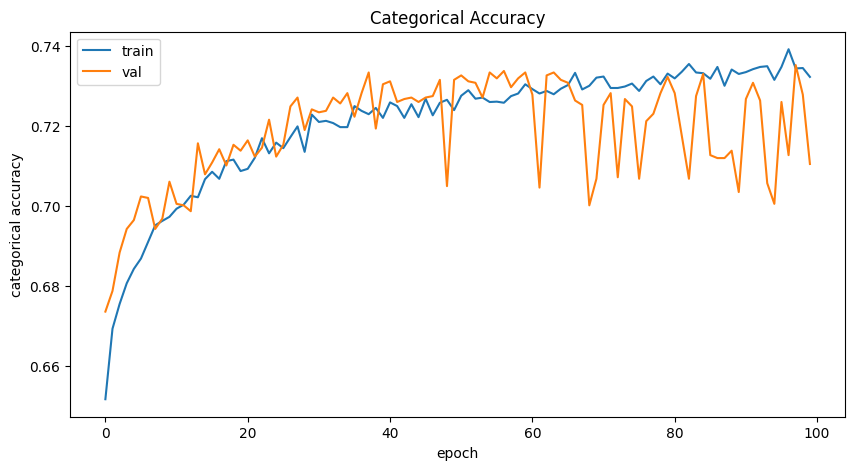

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.29      0.22      0.25         9
           B       0.43      0.20      0.27        15
           C       0.11      0.11      0.11        19
           D       0.39      0.37      0.38        87
           E       0.90      0.93      0.91       568

    accuracy                           0.81       698
   macro avg       0.42      0.36      0.38       698
weighted avg       0.80      0.81      0.80       698

Precision (macro): 0.4233
Recall (macro):    0.3643
F1-score (macro):  0.3845


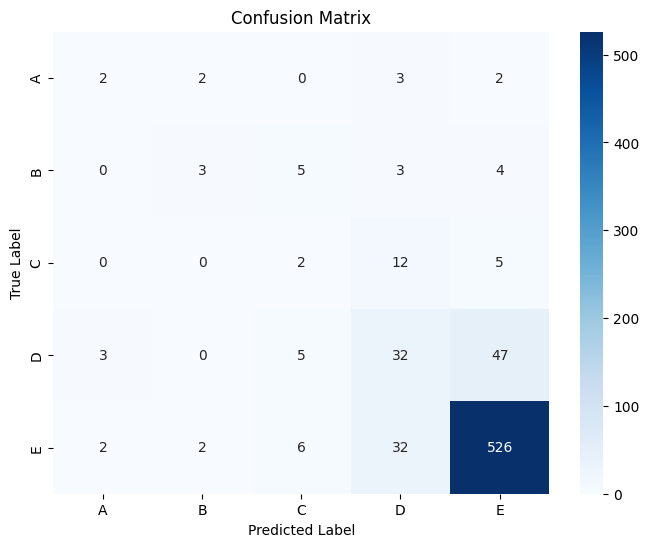

time steps=1  Evaluation Accuracy: 0.809% (+/-0.000)
========== Running for Phase 2 ==========
experiment of time_steps=  1

##############################################################################################################################
X numpy containing sample_rows except final_result column
[[6.600e+01 2.019e+03 1.200e+01 2.020e+03 4.000e+00 2.020e+03 3.000e+00
  2.000e+01 1.400e+01 8.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+00
  5.500e+01 1.000e+01 3.500e+01 1.110e+02 4.700e+01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)                    │ (None, 200)                 │         244,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_layer (Dropout)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Hidden_Layer (Dense)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Output_Layer (Dense)             │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,405 (1.01 MB)

 Trainable params: 265,405 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

None
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.8320 - loss: 0.8217 


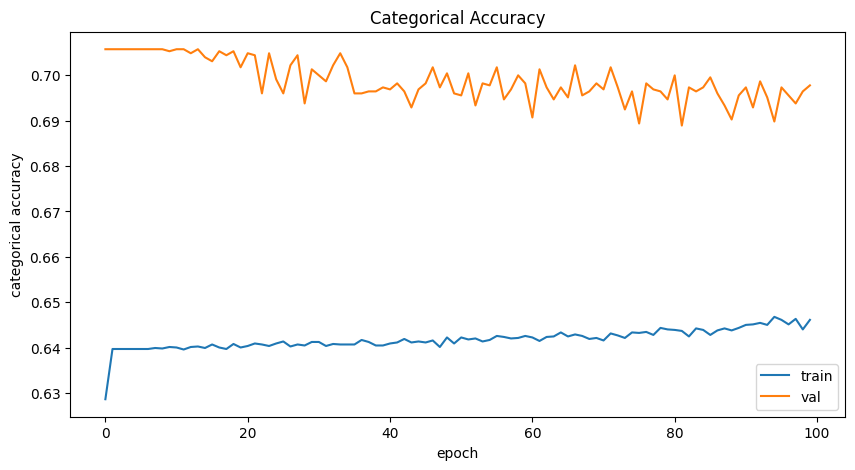

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.00      0.00      0.00        15
           C       0.00      0.00      0.00        19
           D       0.33      0.01      0.02        79
           E       0.82      0.99      0.90       548

    accuracy                           0.81       668
   macro avg       0.23      0.20      0.18       668
weighted avg       0.71      0.81      0.74       668

Precision (macro): 0.2309
Recall (macro):    0.2003
F1-score (macro):  0.1843


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

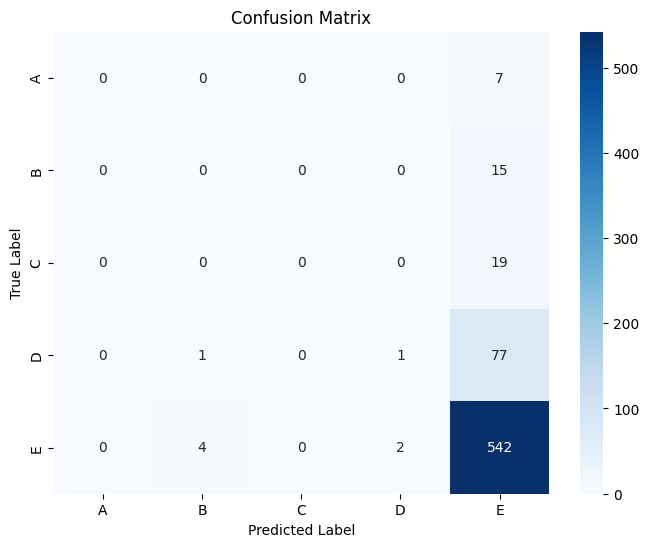

time steps=1  Evaluation Accuracy: 0.813% (+/-0.000)
========== Running for Phase 3 ==========
experiment of time_steps=  1

##############################################################################################################################
X numpy containing sample_rows except final_result column
[[6.60000000e+01 2.01900000e+03 1.20000000e+01 2.02000000e+03
  4.00000000e+00 2.02000000e+03 3.00000000e+00 2.00000000e+01
  1.40000000e+01 8.00000000e+00 0.00000000e+00 0.00000000e+00
  2.00000000e+00 1.00000000e+00 5.50000000e+01 1.00000000e+01
  3.50000000e+01 1.11000000e+02 4.70000000e+01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)                    │ (None, 200)                 │         279,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_layer (Dropout)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Hidden_Layer (Dense)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Output_Layer (Dense)             │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 299,805 (1.14 MB)

 Trainable params: 299,805 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.8094 - loss: 1.0743 


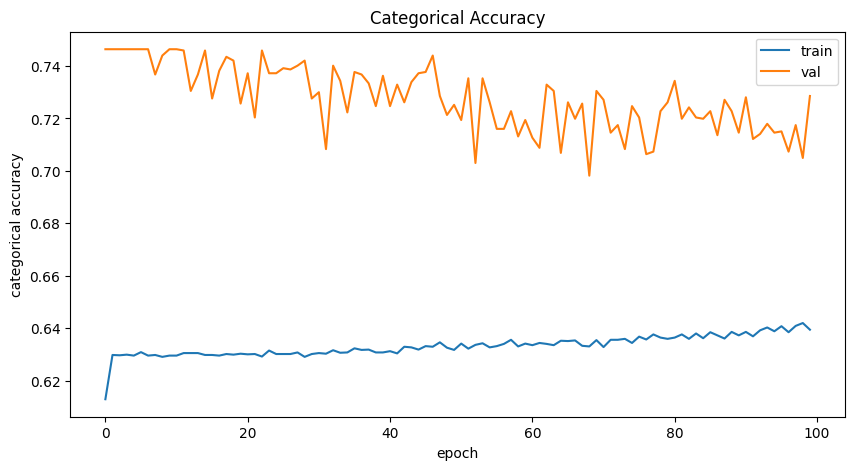

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.00      0.00      0.00        11
           C       0.00      0.00      0.00        16
           D       0.06      0.02      0.03        59
           E       0.83      0.96      0.89       461

    accuracy                           0.80       554
   macro avg       0.18      0.20      0.18       554
weighted avg       0.70      0.80      0.74       554

Precision (macro): 0.1784
Recall (macro):    0.1951
F1-score (macro):  0.1832


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

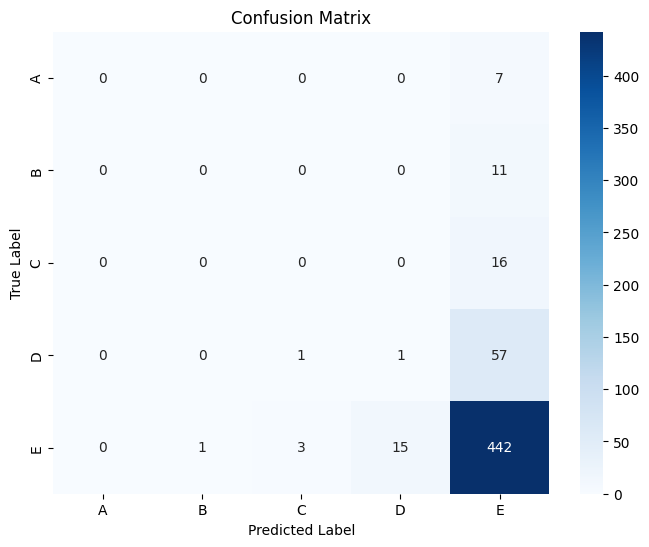

time steps=1  Evaluation Accuracy: 0.800% (+/-0.000)
========== Running for Phase 4 ==========
experiment of time_steps=  1

##############################################################################################################################
X numpy containing sample_rows except final_result column
[[6.600e+01 2.019e+03 1.200e+01 2.020e+03 4.000e+00 2.020e+03 3.000e+00
  2.000e+01 1.400e+01 8.000e+00 0.000e+00 0.000e+00 2.000e+00 1.000e+00
  5.500e+01 1.000e+01 3.500e+01 1.110e+02 4.700e+01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ LSTM_Layer (LSTM)                    │ (None, 200)                 │         313,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dropout_layer (Dropout)              │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Hidden_Layer (Dense)             │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ANN_Output_Layer (Dense)             │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 334,205 (1.27 MB)

 Trainable params: 334,205 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

None
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.7223 - loss: 1.3638 


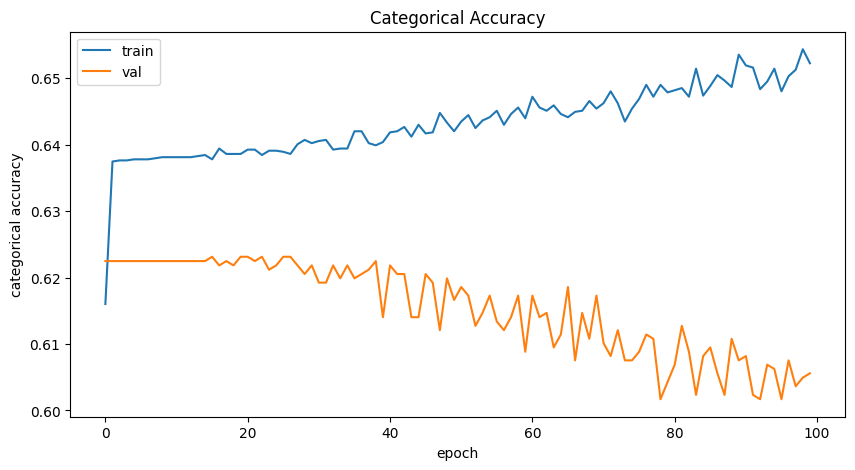

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.00      0.00      0.00         7
           B       0.00      0.00      0.00        11
           C       0.00      0.00      0.00        15
           D       0.11      0.16      0.13        50
           E       0.82      0.82      0.82       394

    accuracy                           0.70       477
   macro avg       0.19      0.20      0.19       477
weighted avg       0.69      0.70      0.69       477

Precision (macro): 0.1863
Recall (macro):    0.1970
F1-score (macro):  0.1906


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classif

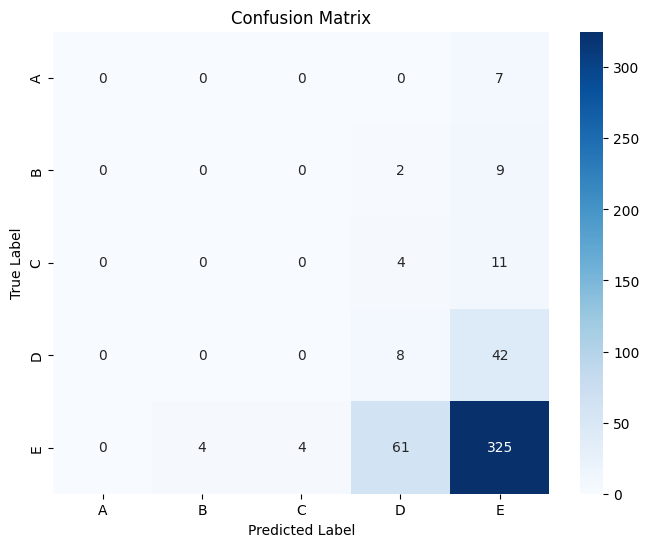

time steps=1  Evaluation Accuracy: 0.698% (+/-0.000)


In [11]:
for phase in range(1, 5):  # phase 1 to 4
    print(f"========== Running for Phase {phase} ==========")
    x_train_prepared, x_test_prepared, y_train_prepared, y_test_prepared = prepare_dataset(1, phase)
    run_experiment(x_train_prepared, y_train_prepared, x_test_prepared, y_test_prepared, phase)

In [ ]:
# Đọc dữ liệu từ các file CSV
final_phase1_train_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase1/user_train_phase_1_train.csv")
final_phase2_train_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase2/user_train_phase_2_train.csv")
final_phase3_train_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase3/user_train_phase_3_train.csv")
final_phase4_train_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase4/user_train_phase_4_train.csv")

final_phase1_test_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase1/user_train_phase_1_test.csv")
final_phase2_test_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase2/user_train_phase_2_test.csv")
final_phase3_test_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase3/user_train_phase_3_test.csv")
final_phase4_test_df = pd.read_csv("/kaggle/input/enrich-data-using-node2vector/phase4/user_train_phase_4_test.csv")


In [ ]:
for phase in range(1, 5):  # phase 1 to 4
    print(f"========== Running for Phase {phase} ==========")
    x_train_prepared, x_test_prepared, y_train_prepared, y_test_prepared = prepare_dataset(1, phase)
    run_experiment(x_train_prepared, y_train_prepared, x_test_prepared, y_test_prepared, phase)